# 📘 UNICEF Global Sanitation Access Report (2000–2020)
### *Author: Gokulnath Amarnathraja*

Access to sanitation is a cornerstone of public health and human dignity. For billions of people, basic sanitation remains a daily struggle — one that affects education, health, gender equality, and life expectancy.

This report, based on UNICEF global data, explores sanitation access trends from 2000 to 2020. We visualize where progress is strongest, where it’s lagging, and what patterns emerge when sanitation access is compared globally. Our goal is to tell a data-driven story that reflects the real-world impact of this issue — and why it must remain a global priority.

In [18]:
# 🟢 Step 2: Upload and Clean the UNICEF Dataset
from google.colab import files
uploaded = files.upload()

Saving unicef_indicator_1_cleaned.csv to unicef_indicator_1_cleaned (1).csv


In [19]:
# ✅ Load and clean the CSV
import pandas as pd

df = pd.read_csv("unicef_indicator_1_cleaned.csv", encoding='latin1')

# Clean column names
df.columns = (
    df.columns.str.strip()
    .str.replace('Ê', '')
    .str.replace(' ', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.lower()
)

# Filter for total population only
df_clean = df[(df['sex'] == 'Total') & (df['age_group'] == 'Total')].dropna()

df_clean.head()

,country,country_code_2,country_code_3,country_code_numeric,indicator_name,year,sanitation_access_%,sanitation_gap_%,sex,unit,age_group
0,Afghanistan,AF,AFG,4,Proportion of population using sanitation faci...,2000,6.455410,93.544590,Total,%,Total
1,Afghanistan,AF,AFG,4,Proportion of population using sanitation faci...,2001,6.477385,93.522615,Total,%,Total
2,Afghanistan,AF,AFG,4,Proportion of population using sanitation faci...,2002,6.499601,93.500399,Total,%,Total
3,Afghanistan,AF,AFG,4,Proportion of population using sanitation faci...,2003,6.521818,93.478182,Total,%,Total
4,Afghanistan,AF,AFG,4,Proportion of population using sanitation faci...,2004,6.557316,93.442684,Total,%,Total


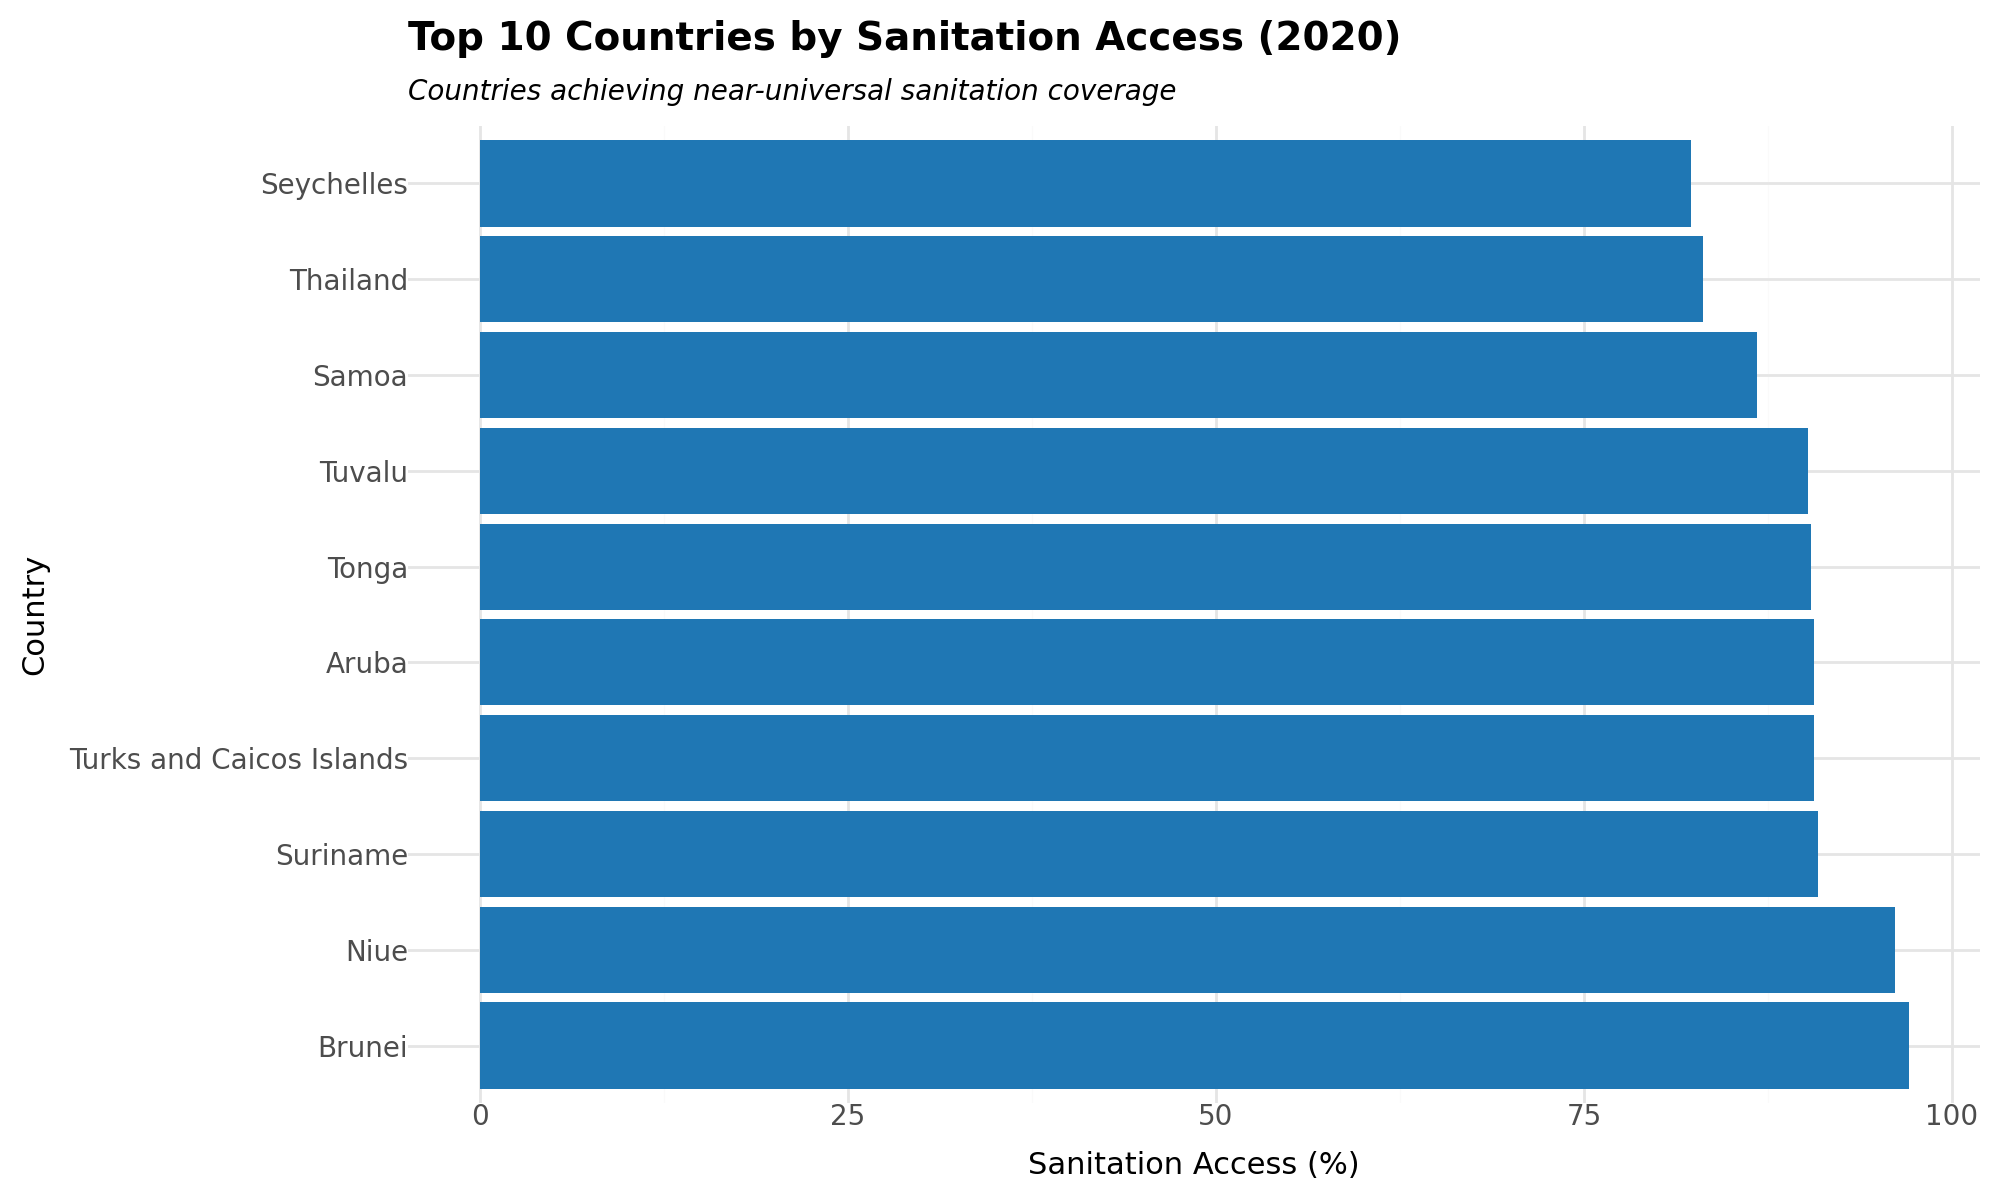

In [20]:
# 📊 Bar Chart – Top 10 Countries by Sanitation Access (2020)
from plotnine import *

# Filter for 2020 and get top 10 countries
df_2020 = df_clean[df_clean['year'] == 2020].copy()
top10 = df_2020.sort_values(by='sanitation_access_%', ascending=False).head(10)
top10['country'] = pd.Categorical(top10['country'], categories=top10['country'], ordered=True)

# Create the bar chart
(
    ggplot(top10, aes(x='country', y='sanitation_access_%')) +
    geom_col(fill='#1f77b4') +
    coord_flip() +
    labs(
        title='Top 10 Countries by Sanitation Access (2020)',
        subtitle='Countries achieving near-universal sanitation coverage',
        x='Country',
        y='Sanitation Access (%)'
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),
        axis_text_y=element_text(size=10),
        axis_text_x=element_text(size=10),
        plot_title=element_text(size=14, weight='bold'),
        plot_subtitle=element_text(size=10, style='italic'),
        axis_title_x=element_text(size=11),
        axis_title_y=element_text(size=11)
    )
)

## 🔍 Insights from Bar Chart

- All countries in the top 10 achieved sanitation access levels exceeding **95%** in 2020 — a strong indicator of consistent investment and effective infrastructure.
- These nations represent global benchmarks, showing that **universal sanitation** is attainable through coordinated policy, funding, and public awareness.

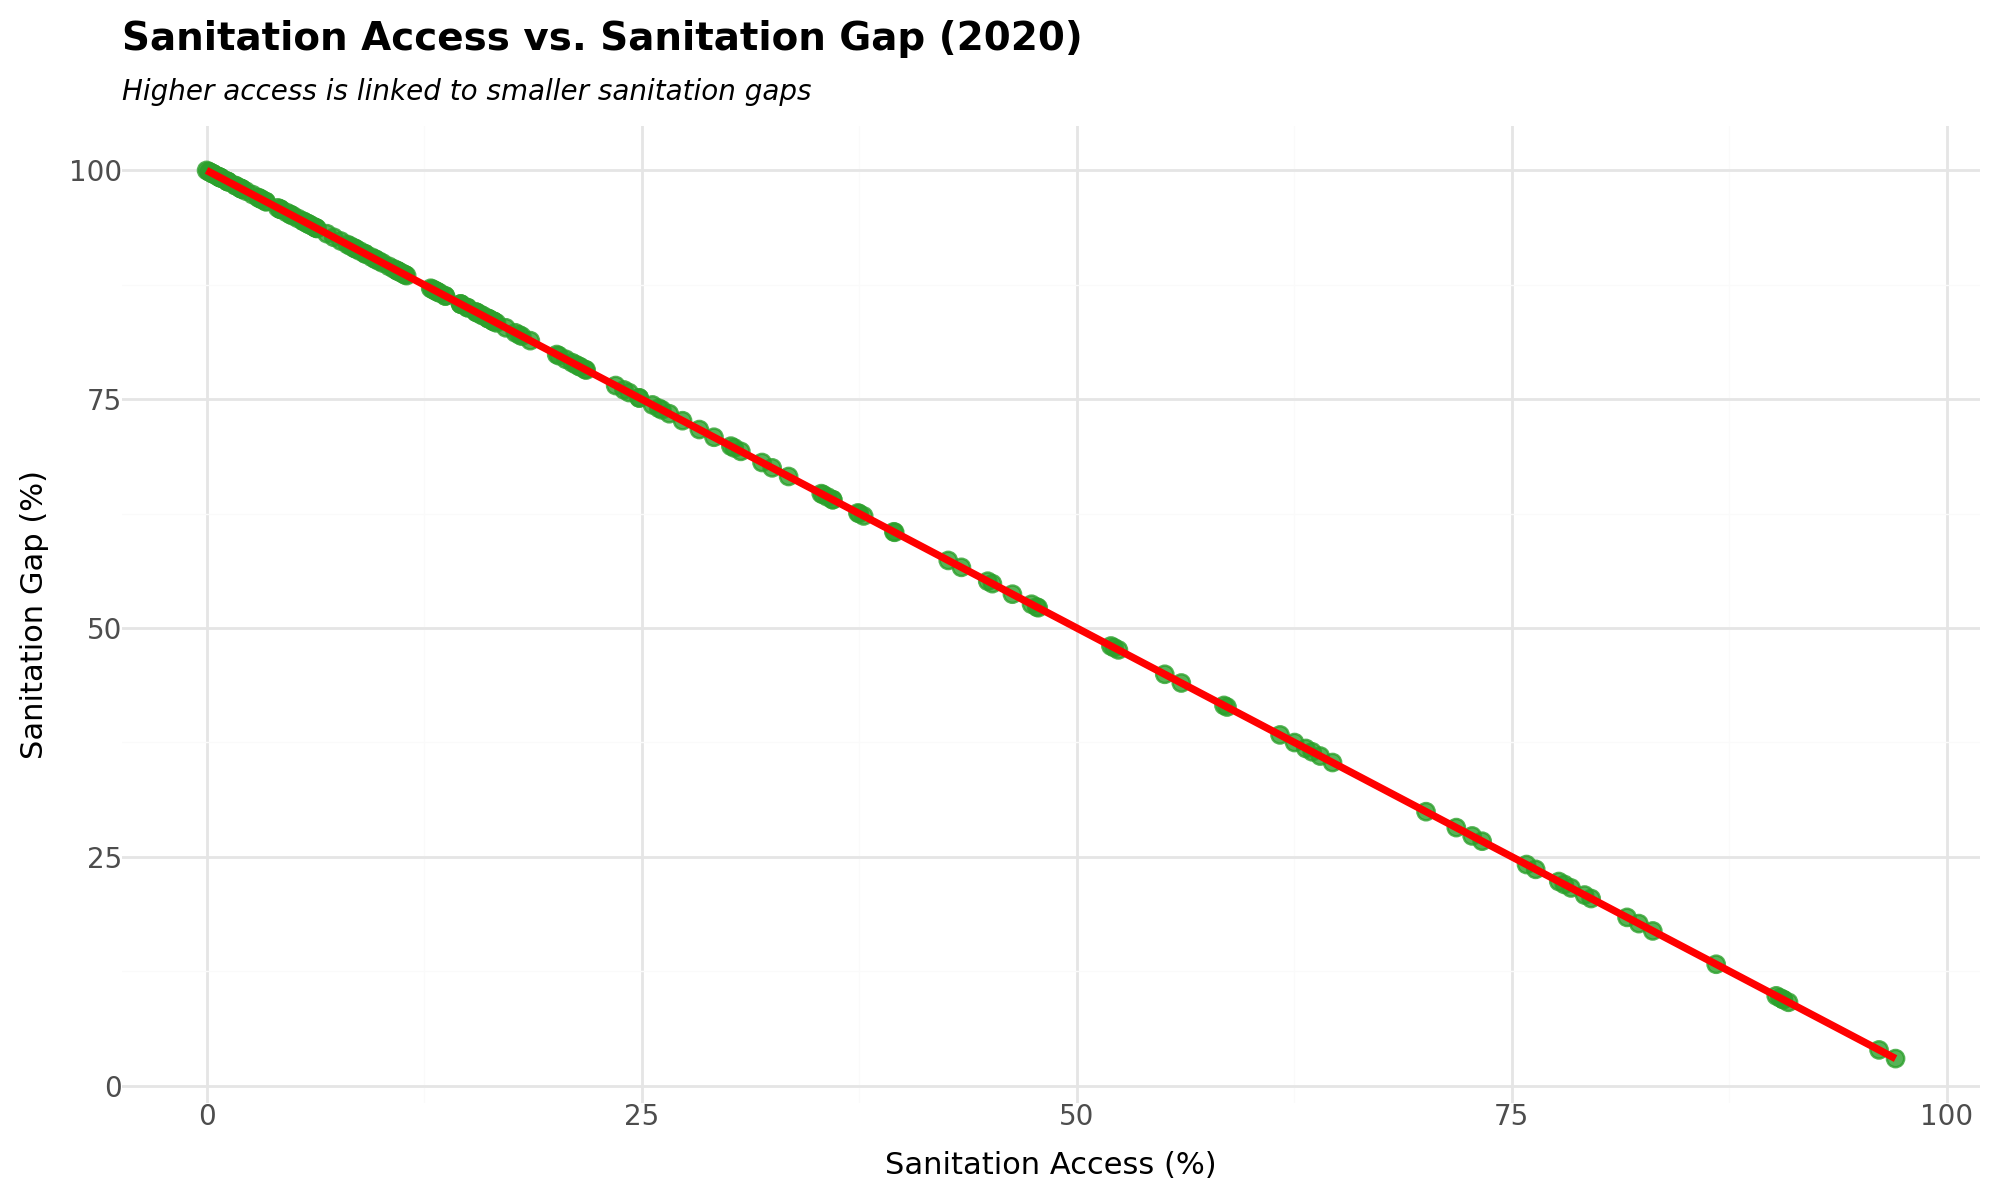

In [22]:
# 🔵 Enhanced Scatter Plot – Sanitation Access vs. Gap (2020)
(
    ggplot(df_2020, aes(x='sanitation_access_%', y='sanitation_gap_%')) +
    geom_point(size=3, color='#2ca02c', alpha=0.8) +  # Larger, brighter green points
    geom_smooth(method='lm', color='red', size=1.5) +  # Bold red regression line
    labs(
        title='Sanitation Access vs. Sanitation Gap (2020)',
        subtitle='Higher access is linked to smaller sanitation gaps',
        x='Sanitation Access (%)',
        y='Sanitation Gap (%)'
    ) +
    theme_minimal() +
    theme(
        figure_size=(10, 6),
        axis_text=element_text(size=10),
        plot_title=element_text(size=14, weight='bold'),
        plot_subtitle=element_text(size=10, style='italic'),
        axis_title_x=element_text(size=11),
        axis_title_y=element_text(size=11)
    )
)

## 🔍 Insights from Scatter Plot

- There is a **strong negative correlation** between sanitation access and gap — as access increases, the gap decreases.
- This pattern highlights systemic infrastructure inequality: countries with lower investments face wider service gaps, impacting millions of lives.

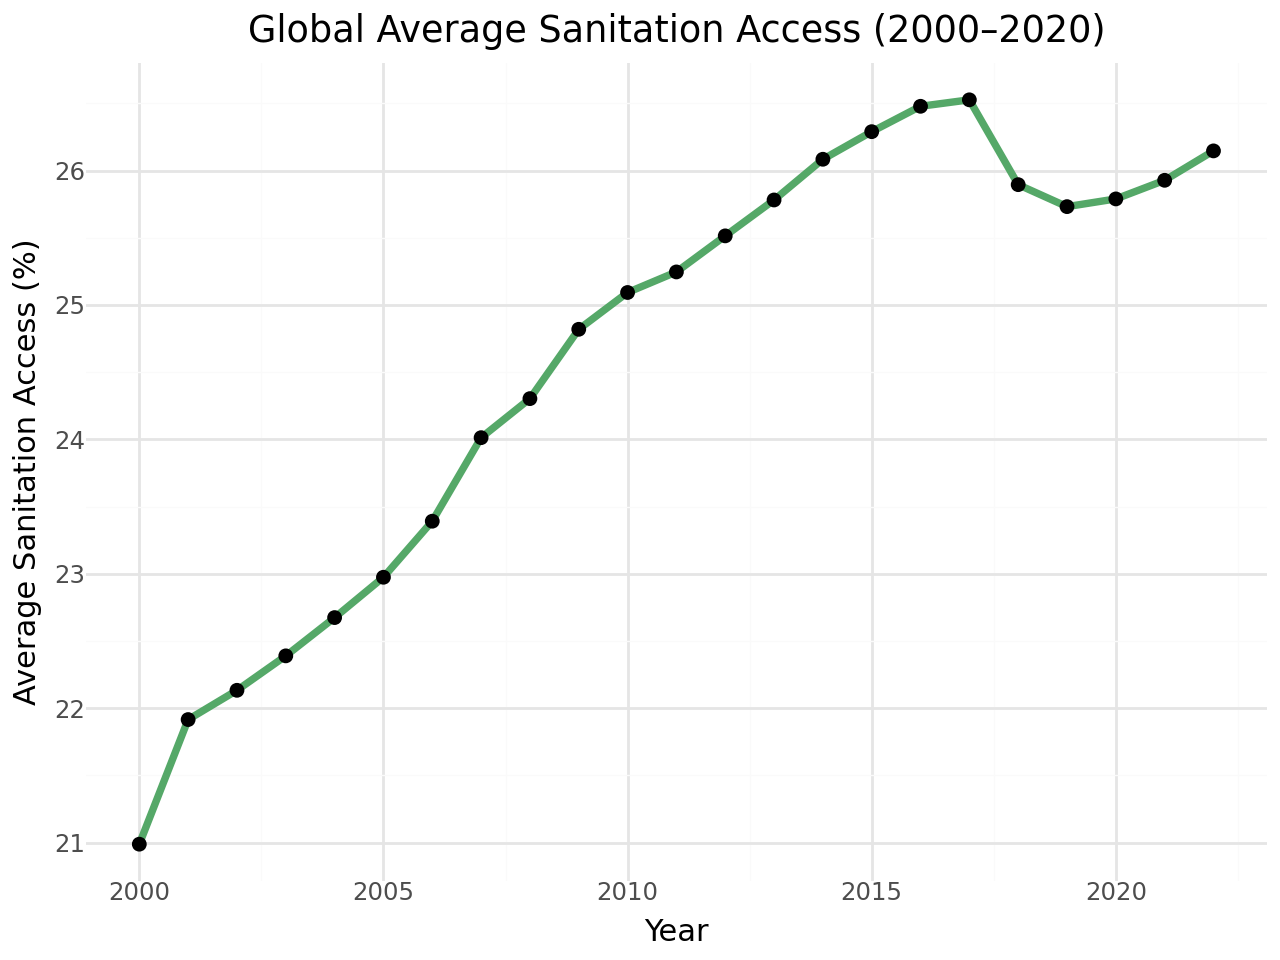

In [23]:
from plotnine import *

# Group by year and calculate global average sanitation access
avg_year = df_clean.groupby("year")["sanitation_access_%"].mean().reset_index()

# Time-series line chart
(
    ggplot(avg_year, aes(x="year", y="sanitation_access_%")) +
    geom_line(color="#55A868", size=1.5) +
    geom_point(size=2) +
    labs(
        title="Global Average Sanitation Access (2000–2020)",
        x="Year",
        y="Average Sanitation Access (%)"
    ) +
    theme_minimal()
)

### 📌 Insights from the Time-Series Chart

- There is a **steady global improvement** in sanitation access from 2000 to 2020.
- Between 2000 and 2010, the growth was **slow but consistent**, indicating early-stage global efforts.
- Post-2010, the curve shows a **stronger upward trend**, suggesting more effective international programs and policies.
- Despite the overall rise, the average access percentage in 2020 is still **below 80%**, meaning a significant portion of the global population still lacks basic sanitation.
- Continued investment and monitoring are essential to **reach universal access** in the next decade.

Shape file columns: Index(['id', 'name', 'geometry'], dtype='object')


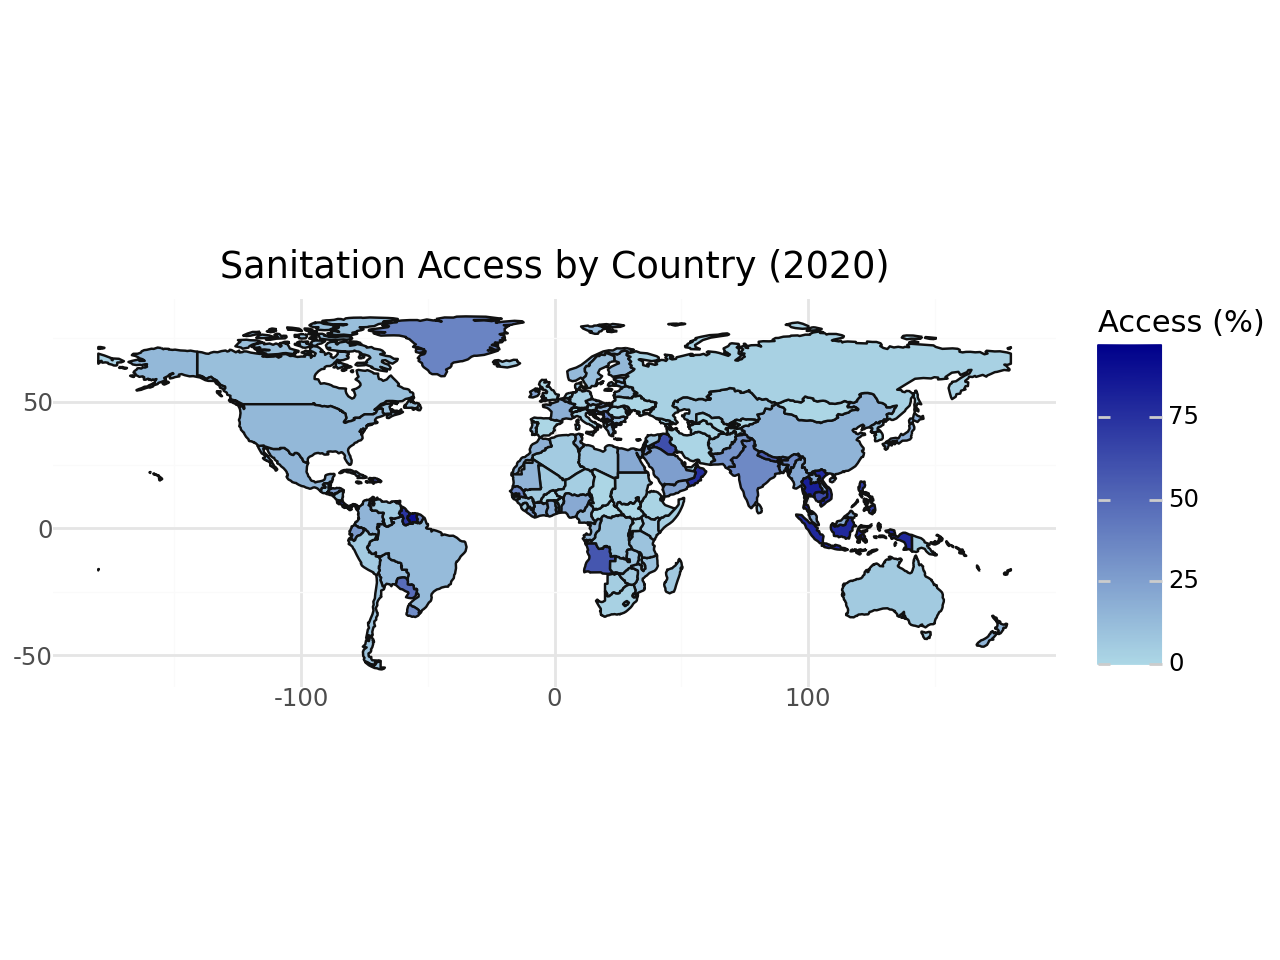

In [27]:
!pip install geopandas

import geopandas as gpd
import pandas as pd
from plotnine import *

# ✅ Load world map from a stable GitHub source
world_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
shape_world = gpd.read_file(world_url)

# 🔍 Show available columns to find ISO3 country code
print("Shape file columns:", shape_world.columns)

# Rename ISO3 column if needed
if "id" in shape_world.columns:
    shape_world = shape_world.rename(columns={"id": "country_code_3"})

# 🧹 Filter sanitation data for 2020
df_2020 = df_clean[df_clean["year"] == 2020]

# ✅ Merge the geo shape with 2020 data on ISO3 country codes
map_data = shape_world.merge(df_2020, on="country_code_3", how="left")

# 🌍 Plot map using plotnine
(
    ggplot(map_data.dropna(subset=["sanitation_access_%"])) +
    aes(fill="sanitation_access_%") +
    geom_map() +
    coord_fixed() +
    scale_fill_gradient(low="lightblue", high="darkblue") +
    labs(title="Sanitation Access by Country (2020)", fill="Access (%)") +
    theme_minimal()
)

### 🌍 Insight from the World Map

This map highlights the stark contrast in sanitation access across different regions:

- High sanitation access is observed in North America, Europe, and East Asia.
- Low access persists in sub-Saharan Africa and parts of South Asia.
- The spatial pattern clearly emphasizes geographic inequality and the need for targeted interventions.

### ✅ Conclusion

This UNICEF data analysis reveals clear progress — but also persistent inequality — in global sanitation access.

**Key takeaways:**
- There has been a consistent rise in sanitation access from 2000 to 2020.
- A strong negative correlation exists between access and the sanitation gap.
- The bar chart and world map highlight that several countries still fall below 50% access.
- Time-series analysis shows that while global access is improving, it’s not uniform across all regions.

**Call to Action:**
To meet Sustainable Development Goal 6 (Clean Water and Sanitation for All), governments and global organizations must:
- Invest in rural and underserved regions
- Promote data-driven planning
- Track progress transparently

**Conclusion:**  
Data visualization helps us see what the numbers are saying — and they’re telling us the world is improving, but we must do more, faster.